
The Singular Value Decomposition (SVD) is a mathematical technique used in linear algebra to decompose a matrix into three other matrices. Specifically, for any $n \times m$ matrix $X$, the SVD is a factorization of the form


$$
X = U \Sigma V^{*},
$$


where:

- $X$ is $n\times m$.
- $U$ is $n \times n$ (unitary with orthonormal columns; columns = *left signular vectors*).
- $V$ is $m \times m$ (unitary with orthonormal columns; columns = *right signular vectors*).
- $\Sigma$ is $n \times m$ with real non-negative entries along the diagonal (*singular values*). The singular values are the square roots of the eigenvalues of $A^{T}A$ or $AA^{T}$.
- When $n \geq m$, $\Sigma$ has at most $m$ non-zero elements on the diagonal.
- Rank of $X$ = number of non-zero singular values.

  
**In numpy:**

- The rows of $V^{T}$ represent the eigenvectors of $X^{T}X$.
- The columns of $U$ represent the eigenvectors of $XX^{T}$.
- The eigenvalues are $\Sigma^{2}$.


<br>

The SVD provides a systematic way to determine a low-dimensional approximation
to high-dimensional data in terms of dominant patterns. This technique
is data-driven in that patterns are discovered purely from data, without
the addition of expert knowledge or intuition.
  
If $X$ is self-adjoint, ($X = X^{*}$), then the singular values of $X$ are equal to the absolute values of the eigenvalues of $X$. In Numpy, we compute the SVD as follows:

In [1]:

import numpy as np

X = np.random.rand(5, 3)
U, S, Vt = np.linalg.svd(X, full_matrices=True)
Uhat, Shat, Vhatt = np.linalg.svd(X, full_matrices=False)

print("\nfull_matrices=True:")
print(f"U.shape: {U.shape}.")
print(f"S.shape: {S.shape}.")
print(f"Vt.shape: {Vt.shape}.")

print("\nfull_matrices=False:")
print(f"Uhat.shape: {Uhat.shape}.")
print(f"Shat.shape: {Shat.shape}.")
print(f"Vhatt.shape: {Vhatt.shape}.")

print(f"\nS:\n{S}.\n")
print(f"Shat:\n{Shat}.\n")



full_matrices=True:
U.shape: (5, 5).
S.shape: (3,).
Vt.shape: (3, 3).

full_matrices=False:
Uhat.shape: (5, 3).
Shat.shape: (3,).
Vhatt.shape: (3, 3).

S:
[2.13628638 0.91901978 0.39330927].

Shat:
[2.13628638 0.91901978 0.39330927].



### Matrix Approximation


Perhaps the most useful and defining property of the SVD is that it provides an optimal low-rank approximation to a matrix $X$. The Eckhart-Young theorem states that the optimal rank-$r$ approximation to $X$ in a least-squares sense is given by the 
rank-$r$ SVD truncation $\tilde X$:

$$
\underset{\tilde X, \hspace{.25em} \mathrm{s.t.} \hspace{.25em}\mathrm{rank}(\tilde X)=r}{\mathrm{argmin}} || X - \tilde X||_{F} = \tilde U \tilde \Sigma \tilde V^{*},
$$

where:

- $\tilde U, \tilde V$ represent the first $r$ leading columns of $U, V$.
- $\tilde \Sigma$ represents the leading $r \times r$ sub-block of $\Sigma$.
- $||\cdot||_{F}$ represents the Frobenius norm.

<br>

Because $\Sigma$ is diagonal, the rank-$r$ SVD approximation is given by the sum of $r$ distinct rank-1 matrices:

$$
\tilde X = \sum_{k=1}^{r} \sigma_{k} \boldsymbol{u}_{k} \boldsymbol{v}_{k}^{*} = \sigma_{1} \boldsymbol{u}_{1} \boldsymbol{v}_{1}^{*} + \sigma_{2} \boldsymbol{u}_{2} \boldsymbol{v}_{2}^{*} + \cdots + \sigma_{r} \boldsymbol{u}_{r} \boldsymbol{v}_{r}^{*}
$$

The truncated SVD basis $\tilde U$ provides a coordinate transformation from the high-dimensional original matrix
into a lower dimensional representation. 


For truncation values $r$ that are smaller than the number of non-zero singular values (i.e.,
the rank of $X$), the truncated SVD only approximates $X$:

$$
\tilde X \approx \tilde U \tilde \Sigma \tilde V^{*}
$$

If we choose the truncation value to keep all non-zero singular values, then $\tilde X = \tilde U \tilde \Sigma \tilde V^{*}$ is exact.


<br>


### Example: Image Compression

For the next example, we use an alternate cover photo from the Allman Brothers 1971 release *At Fillmore East*, shown in color and grayscale side-by-side. We'll work with the grayscale image going forward since it limits us to two dimensions:

img.shape: (800, 800)


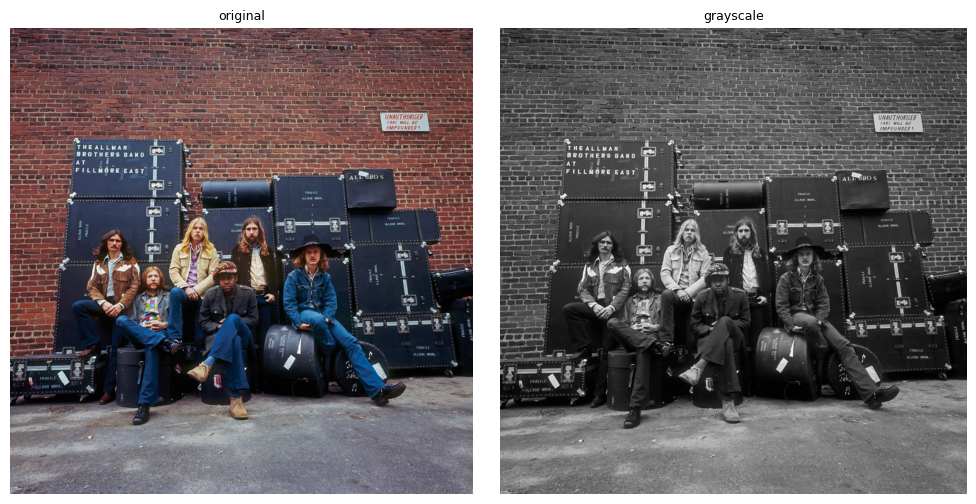

In [2]:

from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

# 3-D RGB image. 
imgrgb = io.imread("fillmore.jpg")

# 2-D grayscale image.
img = rgb2gray(imgrgb)

# Make grayscale image symmetric. 
img = img[:800, :800]

print(f"img.shape: {img.shape}")


fig, ax = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)# figsize=(8, 4))

ax[0].imshow(imgrgb)
ax[0].set_title("original", fontsize=9)
ax[0].set_axis_off()

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title("grayscale", fontsize=9)
ax[1].set_axis_off()

plt.show()




<br>

Next we generate successive rank-$r$ approximations of the original image, showing the storage requirement of each rank-$r$ approximation. 

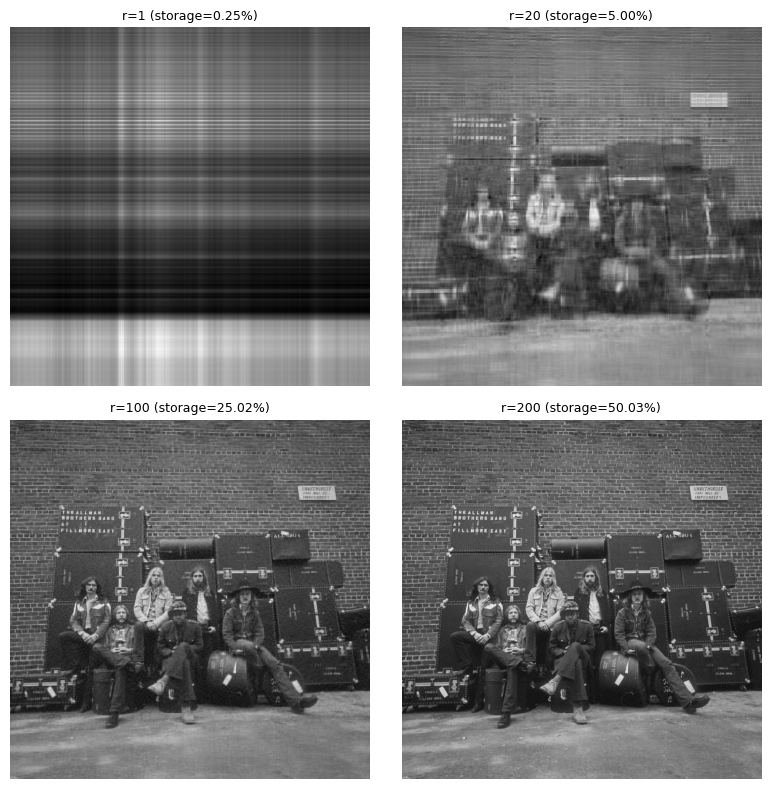

In [4]:

# Grayscale image.
X = img

# Run SVD on grayscale image X. 
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Convert signular values array to full matrix. 
S = np.diag(S) 


# Rank-r approximations to evaluate. 
ranks = [1, 20, 100, 200,]# len(S)]

# Matplotlib indices. 
indices = [(0, 0), (0, 1), (1, 0), (1, 1)]


# Number of values associated with original image.
total_nbr_vals = np.prod(X.shape)

fig, ax = plt.subplots(2, 2, tight_layout=True, figsize=(8, 8))

for r, (ii, jj) in zip(ranks, indices):
    
    # Compute rank-r approximation of X.
    Xr = U[:, :r] @ S[:r, :r] @ Vt[:r, :]

    # Compute storage or rank-r approximation vs. full image.
    rank_r_nbr_vals = np.prod(U[:, :r].shape) + r + np.prod(Vt[:r, :].shape)
    rank_r_storage = rank_r_nbr_vals / total_nbr_vals

    # Display rank-r approximation.
    ax[ii, jj].imshow(Xr, cmap=plt.cm.gray)
    ax[ii, jj].set_title(f"r={r:,.0f} (storage={rank_r_storage:.2%})", fontsize=9)
    ax[ii, jj].set_axis_off()

plt.show()


<br>

A rank-100 approximation provides a decent representation of the original. At rank-200, there is virtually no difference between the original and the approximation. In practice, we could store `U[:, :200], S[:200, :200]` and `Vt[:200, :]` separately, then compute the matrix product prior to rendering the image. Doing so reduces the storage requirements by a factor of 2. 

We can plot the magnitude of the singular values along with the cumulative proportion to assess how much variation in the original image is captured for a given rank-$r$ approximation:


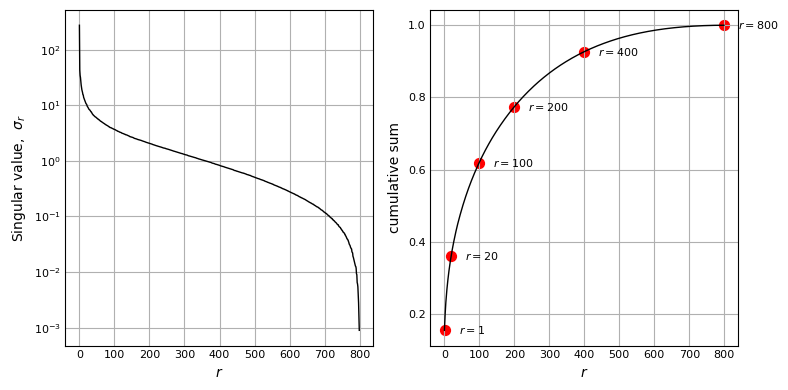

In [5]:

s = np.diag(S)

ranks = ranks + [400, 800]

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(8, 4))
ax[0].semilogy(s, color="#000000", linewidth=1)
ax[0].set_ylabel(r"Singular value,  $\sigma_{r}$")
ax[0].set_xlabel(r"$r$")
ax[0].tick_params(axis="x", which="major", direction='in', labelsize=8)
ax[0].tick_params(axis="x", which="minor", direction='in', labelsize=8)
ax[0].tick_params(axis="y", which="major", direction='in', labelsize=8)
ax[0].tick_params(axis="y", which="minor", direction='in', labelsize=8)
ax[0].xaxis.set_ticks_position("none")
ax[0].yaxis.set_ticks_position("none")
ax[0].grid(True)

ax[1].plot(np.cumsum(s) / np.sum(s), color="#000000", linewidth=1)
ax[1].set_ylabel(r"cumulative sum")
ax[1].set_xlabel(r"$r$")
ax[1].tick_params(axis="x", which="major", direction='in', labelsize=8)
ax[1].tick_params(axis="x", which="minor", direction='in', labelsize=8)
ax[1].tick_params(axis="y", which="major", direction='in', labelsize=8)
ax[1].tick_params(axis="y", which="minor", direction='in', labelsize=8)
ax[1].xaxis.set_ticks_position("none")
ax[1].yaxis.set_ticks_position("none")
ax[1].grid(True)

for r in ranks:
    y = np.sum(s[:r]) / np.sum(s)
    ax[1].scatter(r, y, s=50, color="red")
    ax[1].annotate(
    r"$r=$" + "{:,.0f}".format(r), xycoords="data", xy=(r, y), 
    xytext=(10, 0), textcoords="offset points", ha="left", va="center", 
    fontsize=8, rotation=0, weight="normal", color="#000000", 
    )

plt.show()


<br>

The rank-100 approximation accounts for ~60% of the cumulative sum of singular values. By rank-200, the approximation is closer to 80%. For completeness, we also show that a rank-800 approximation is able to recover the original image fully, since it is using all singular values and vectors (the original grayscale image was 800 x 800). The benefit of using SVD for image compression lies in its ability to prioritize and retain the most significant features of the image data, while excluding less significant features.
<br>

Note that much of this analysis is based on Chapter 1 of Steve Brunton's *Data-Driven Science and Engineering*, which is an excellent resource for practicing Data Scientists. Be sure to pickup your own copy, as the second edition was recently released. 
